In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


# 유틸

In [ ]:
def save_model(model_name: str, model: keras.models.Model):
    model_json = model.to_json()
    with open(model_name, "w") as json_file:
        json_file.write(model_json)

from keras.models import model_from_json
from typing import Optional

In [ ]:
def load_model(
    model_name: str, with_weights_path: Optional[str] = None
) -> keras.models.Model:
    json_file = open(model_name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    if with_weights_path:
        model.load_weights(with_weights_path)
    return model

In [ ]:
# 구글 드라이브 import
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

import os
gdrive_path = os.path.join("/gdrive", "My Drive", "lecture", "resources")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


# CNN Classification

## Fashion MNIST

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0               


train_labels[:20]

4423680/4422102 [==============================] - 0s 0us/step


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

## 모델 1

### 모델 1 생성

In [ ]:
def cnn_classification_model():
  input = keras.layers.Input((28, 28, 1))

  conv_1 = keras.layers.Conv2D(6, 3, activation='relu', padding='same')(input)
  conv_1 = keras.layers.Conv2D(6, 3, activation='relu', padding='same')(conv_1)
  pool_1 = keras.layers.MaxPooling2D((2, 2), strides=2)(conv_1)

  conv_3 = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(pool_1)
  conv_3 = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(conv_3)
  pool_2 = keras.layers.MaxPooling2D((2, 2), strides=2)(conv_3)

  flatten = keras.layers.Flatten()(pool_2)
  dense_1 = keras.layers.Dense(120)(flatten)
  dense_2 = keras.layers.Dense(84)(dense_1)
  dense_3 = keras.layers.Dense(10, activation='softmax')(dense_2)

  return keras.models.Model(inputs=[input], outputs=[dense_3])

In [ ]:
model = cnn_classification_model()
model.summary()

Model: "functional_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 28, 28, 6)         60        
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 28, 28, 6)         330       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 14, 14, 16)        880       
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 7, 7, 16)        

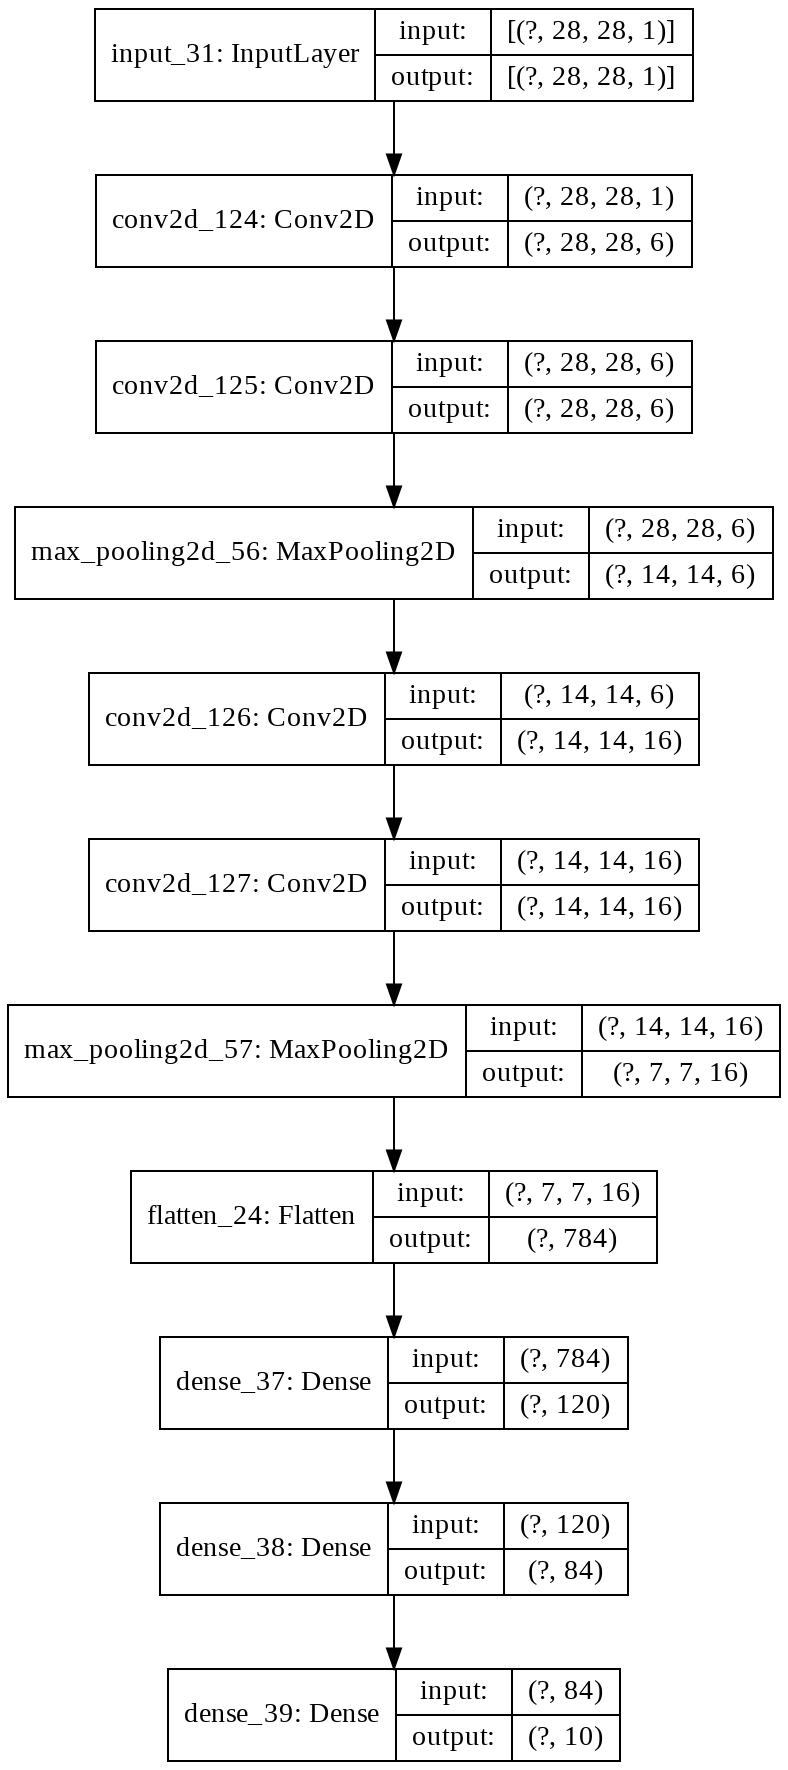

In [ ]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='model.png', expand_nested=True, dpi=144)

### 모델 1 트레이닝

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
num_train_examples = len(train_images)

import math

history = model.fit(train_images, train_labels, epochs=10, batch_size=BATCH_SIZE, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.4477 - accuracy: 0.8389
Epoch 2/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.3109 - accuracy: 0.8874
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2759 - accuracy: 0.9008
Epoch 4/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2540 - accuracy: 0.9064
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2393 - accuracy: 0.9130
Epoch 6/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2299 - accuracy: 0.9159
Epoch 7/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2185 - accuracy: 0.9204
Epoch 8/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2108 - accuracy: 0.9228
Epoch 9/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2043 - accuracy: 0.9260
Epoch 10/10
1875/1875 [==============================] - 71s 38m

[0.8389000296592712,
 0.8873833417892456,
 0.9008333086967468,
 0.906416654586792,
 0.9130499958992004,
 0.9159166812896729,
 0.920366644859314,
 0.9227666854858398,
 0.9260166883468628,
 0.9263833165168762]

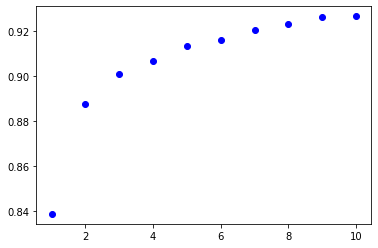

In [ ]:
history_accuracy = history.history["accuracy"]

epochs = range(1, len(history_accuracy) + 1)
plt.plot(epochs, history_accuracy, "bo", label="Training accuracy")
history_accuracy

[0.44774121046066284,
 0.31090623140335083,
 0.27592864632606506,
 0.25403913855552673,
 0.23928485810756683,
 0.22994254529476166,
 0.21846124529838562,
 0.21080468595027924,
 0.2042691558599472,
 0.19717836380004883]

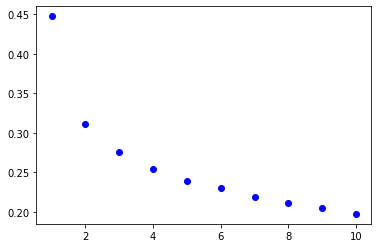

In [ ]:
history_loss = history.history["loss"]

epochs = range(1, len(history_loss) + 1)
plt.plot(epochs, history_loss, "bo", label="Training loss")
history_loss

### 모델 1 테스트 및 예측

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 5s - loss: 0.2618 - accuracy: 0.9081
테스트 정확도: 0.9081000089645386


In [ ]:
save_model(os.path.join(gdrive_path, "cnn_classification_model_000.json"), model)

import time
run_id: str = time.strftime("%Y%m%d-%H%M%S")
model.save_weights(os.path.join(gdrive_path, "cnn_classification_model_000__{}.hdf5".format(run_id)))

In [ ]:
json_model_path = os.path.join(gdrive_path, "cnn_classification_model_000.json")
model_weight_path = os.path.join(gdrive_path, "cnn_classification_model_000__20200905-191418.hdf5")
loaded_model2_with_weight = load_model(json_model_path, model_weight_path)
prediction_loaded_model2_with_weight = loaded_model2_with_weight.predict(test_images)

print("예측: {}".format(np.argmax(prediction_loaded_model2_with_weight[0])))
print(prediction_loaded_model2_with_weight[0])
print("정답 :{}".format(test_labels[0]))

예측: 9
[4.7191301e-10 1.9070540e-06 1.4341052e-09 2.9735606e-10 2.9454103e-10
 1.5702721e-05 3.0915284e-11 1.3323488e-03 7.4646123e-11 9.9865001e-01]
정답 :9
